In [1]:
import sys
import os

print("Current Working Directory:", os.getcwd())

# Add the examples directory to sys.path so we can import the set_random_seed function and other utilities from causal_helpers
examples_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'examples'))
sys.path.append(examples_dir)
# Now import set_random_seed directly from causal_helpers
from causal_helpers import set_random_seed
from cyclic_obs_data_generator import sample_er_dcg, sample_W, sample_data

# Add the data directory to sys.path so we can save and load data files
data_dir = os.path.abspath(os.path.join(examples_dir, '..', 'data'))

# Use the function
seed = 41 # main seed
set_random_seed(seed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("Current Working Directory:", os.getcwd())

Current Working Directory: /home/amine.mcharrak/pcax/examples
Current Working Directory: /home/amine.mcharrak/pcax/examples


In [2]:
# Example usage
num_samples = 4000
n_vars = 15
max_degree = 5
max_cycle = 5

# Generate data
B = sample_er_dcg(n_vars=n_vars, max_degree=max_degree, max_cycle=max_cycle)
W, noise_scales = sample_W(B)
X = sample_data(B=B, noise_scales=noise_scales, num_samples=num_samples)
data = pd.DataFrame(X, columns=[f"X{i}" for i in range(n_vars)])

# Display the adjacency matrix and a preview of the data
print("Adjacency Matrix:")
print(B)
print("\nGenerated Data:")
print(data.head())
print("\nTrue Weights:")
print(W)

Adjacency Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Generated Data:
         X0        X1        X2            X3        X4        X5        X6  \
0 -2.893446 -0.722041 -0.189330 -5.196567e-01  0.001233 -0.397465 -0.195613   
1  1.071636  0.963239  0.319272  3.175352e-01  0.387301  0.322582  0.187177   
2  1.62

In [3]:
data.describe()

X0           X1           X2            X3            X4  \
count  4000.000000  4000.000000  4000.000000  4.000000e+03  4.000000e+03   
mean     -0.015791     0.015182    -0.009691 -6.630526e-03 -7.264958e-03   
std       2.636305     2.320704     0.429804  3.419444e-01  1.197127e+00   
min     -11.665499    -9.444118    -1.817525 -1.129563e+00 -3.909776e+00   
25%      -1.341732    -0.932496    -0.194862 -3.511906e-02 -1.120796e-01   
50%      -0.019779     0.004377    -0.000260  5.415175e-12  3.126764e-11   
75%       1.320953     0.954205     0.178285  3.631028e-02  1.385677e-01   
max      10.922683     9.765408     1.923021  1.132012e+00  3.900205e+00   

                 X5           X6           X7           X8           X9  \
count  4.000000e+03  4000.000000  4000.000000  4000.000000  4000.000000   
mean   7.248735e-03    -0.009040    -0.025449     0.006997    -0.008509   
std    1.075600e+00     0.430910     0.911504     1.076279     1.359292   
min   -4.158426e+00    -1.955967    -3.637793    -4.175284    -6.723097   
25%   -3.223591e-01    -0.203375    -0.481965    -0.321422    -0.711765   
50%    8.404716e-08    -0.002772    -0.008008     0.000056    -0.006427   
75%    3.455659e-01     0.183859     0.444860     0.345394     0.703566   
max    4.349584e+00     1.916741     3.854761     4.336610     6.063734   

                X10          X11           X12          X13          X14  
count  4.000000e+03  4000.000000  4.000000e+03  4000.000000  4000.000000  
mean  -5.115976e-04    -0.017463  6.914294e-03    -0.020407     0.030325  
std    2.456577e-01     2.635342  1.075966e+00     2.442496     2.486423  
min   -8.272943e-01   -11.663939 -4.158379e+00    -9.914256    -9.364612  
25%   -2.542470e-02    -1.349576 -3.247799e-01    -1.495380    -1.187909  
50%   -2.337019e-14    -0.010865  5.756782e-08     0.002527     0.019913  
75%    2.466731e-02     1.316282  3.418305e-01     1.456095     1.296770  
max    8.238825e-01    10.927744  4.333091e+00     8.646484     9.798239

In [4]:
dir_name = os.path.join(data_dir, "linear_cyclic")

os.makedirs(dir_name, exist_ok=True)

# store the adjacency matrix as a csv file named "adj_matrix.csv" without header
adj_matrix_df = pd.DataFrame(B)
adj_matrix_df.to_csv(f"{dir_name}/adj_matrix.csv", header=False, index=False)

# store the data as a csv file named "train.csv" without header
data.to_csv(f"{dir_name}/train.csv", header=False, index=False)

# store the weighted adjacency matrix as a csv file named "W.csv" without header
W_df = pd.DataFrame(W)
W_df.to_csv(f"{dir_name}/W_adj_matrix.csv", header=False, index=False)

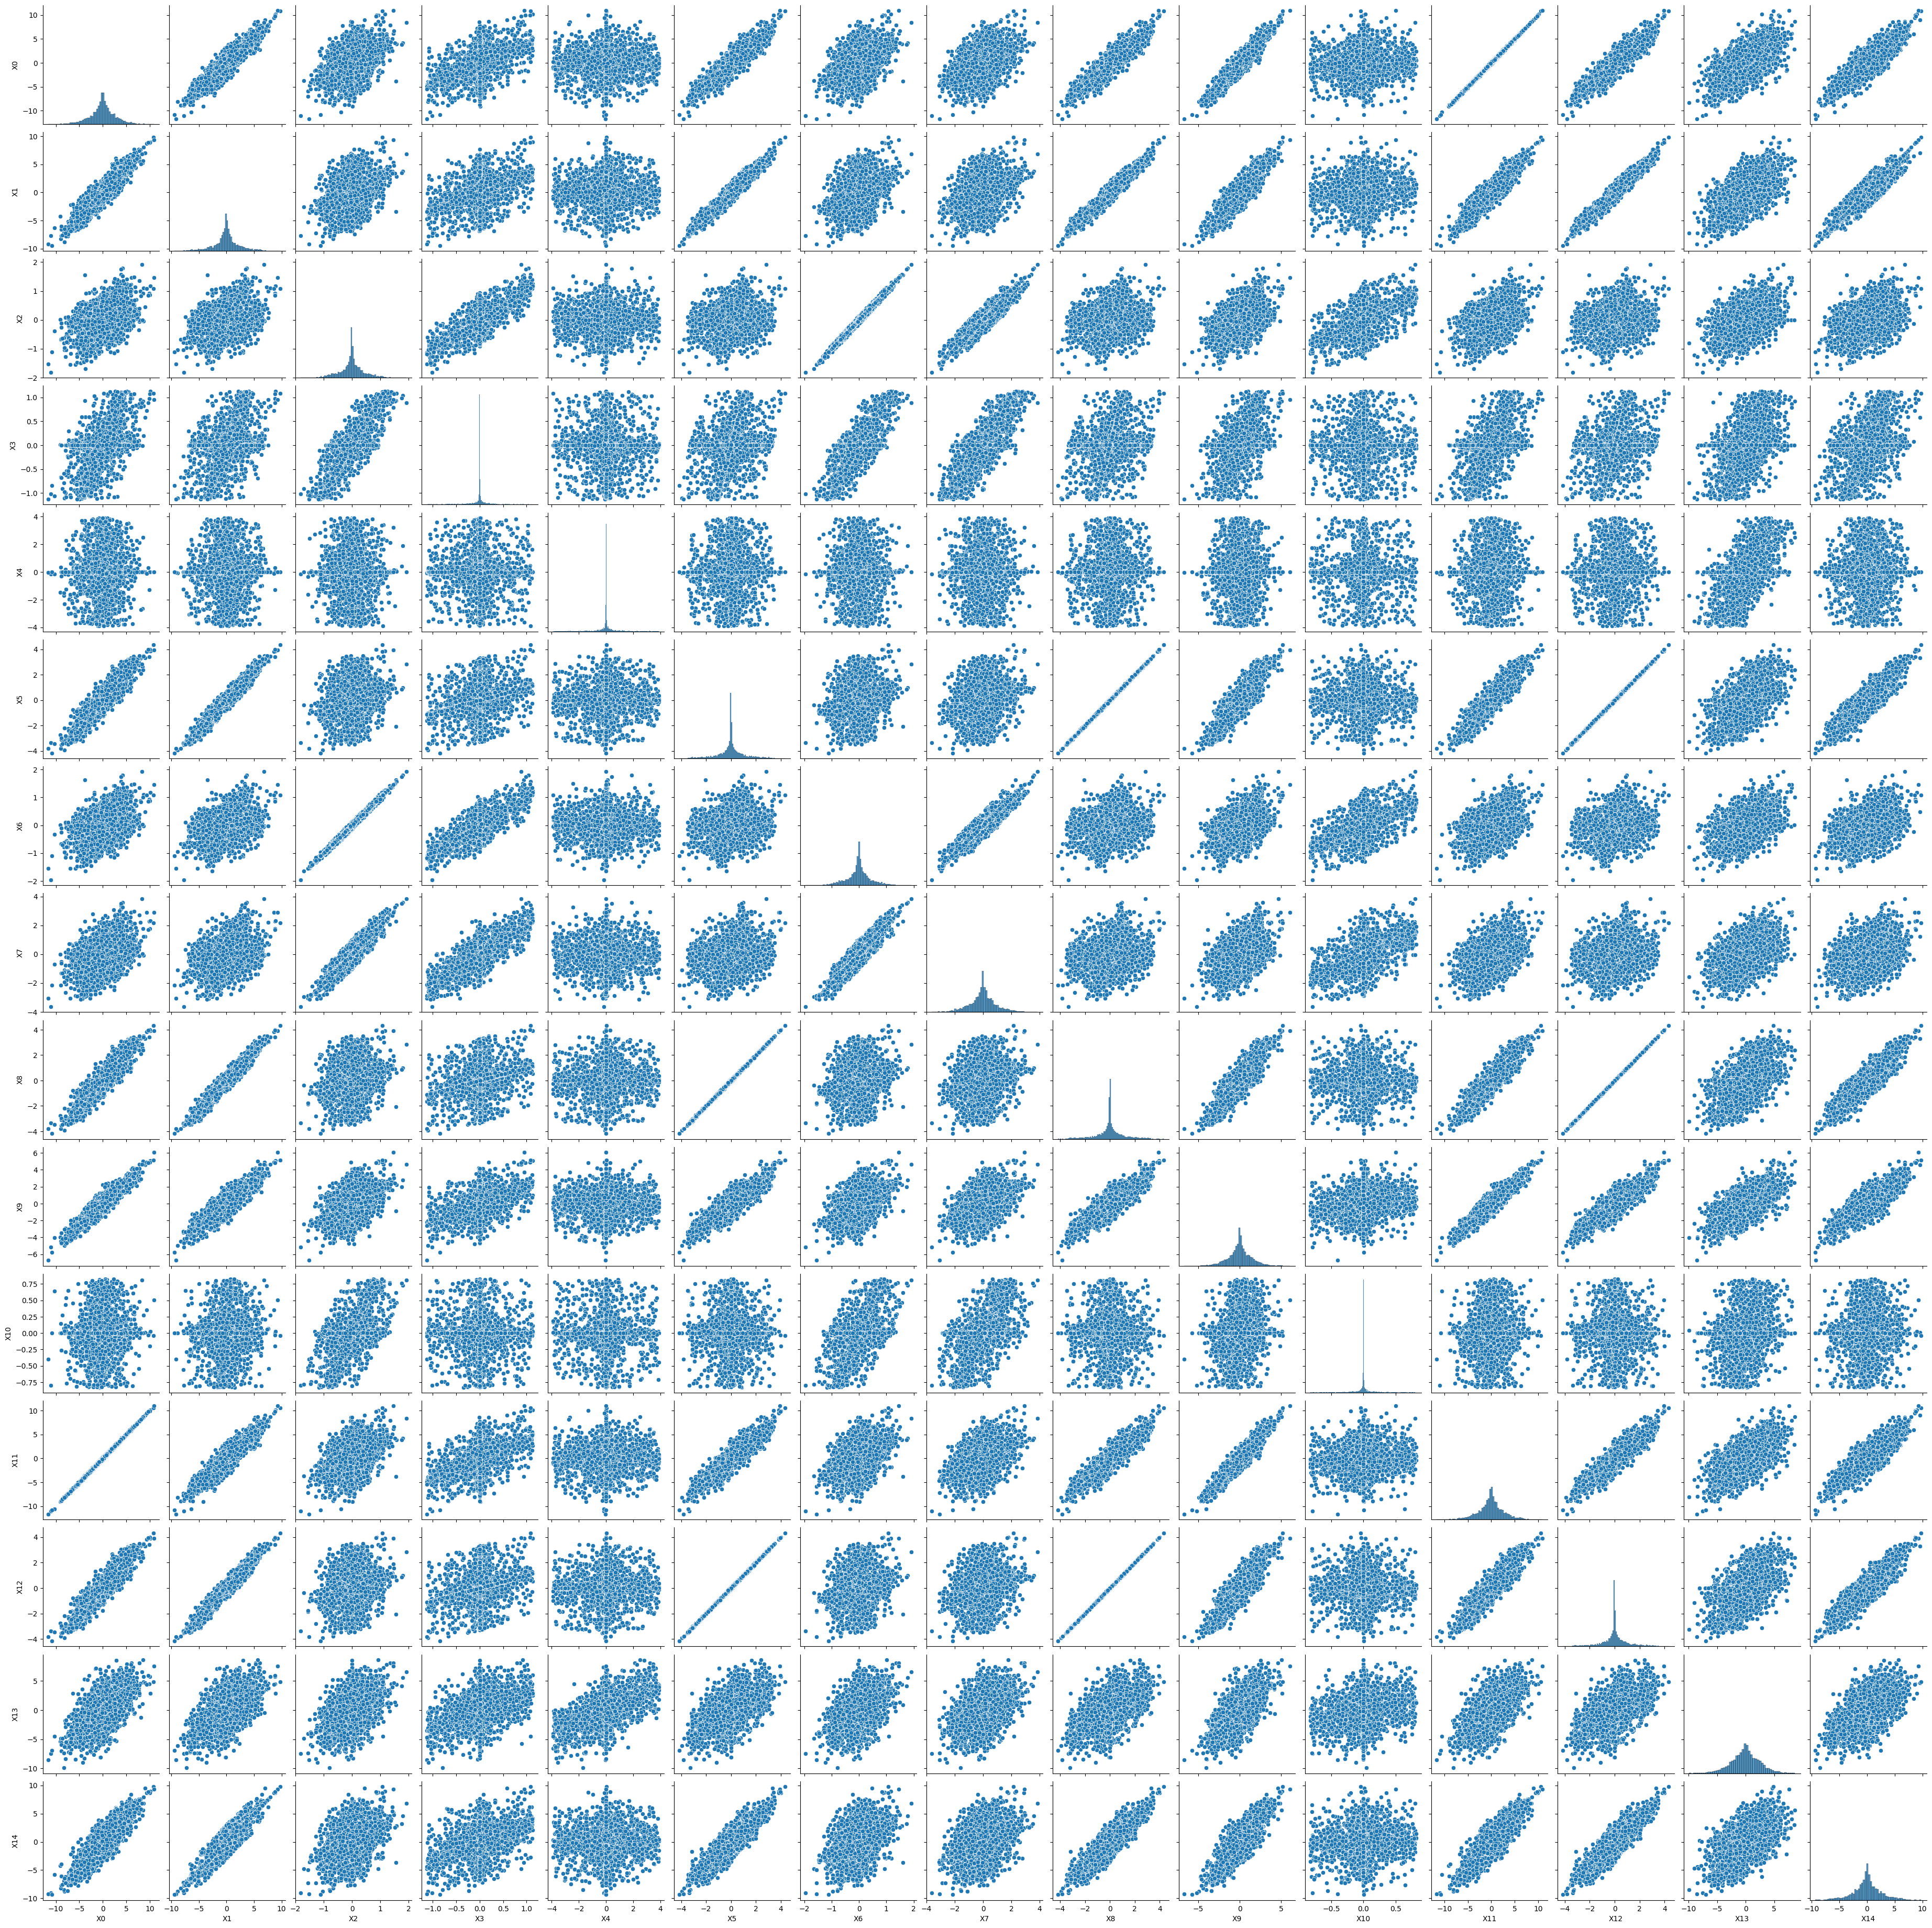

In [5]:
# plot the distribution of all variables against each other and save the plot as "pairplot.pdf"
import seaborn as sns
sns.pairplot(data)
plt.savefig(f"{dir_name}/pairplot.pdf")

In [ ]:
################################## MISC ##################################

In [ ]:
# Parameters for the uniform distribution
low, high = -1, 1  # Range of the uniform distribution
size = 100000  # Number of samples

# Generate uniform samples
uniform_samples = np.random.uniform(0.5, 1.5, size)

# Apply the power transformation
power = 5
transformed_samples = uniform_samples**power

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))

# Original uniform distribution
plt.subplot(1, 2, 1)
plt.hist(uniform_samples, bins=100, density=True, alpha=0.7, color='blue')
plt.title("Original Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")

# Transformed distribution
plt.subplot(1, 2, 2)
plt.hist(transformed_samples, bins=100, density=True, alpha=0.7, color='orange')
plt.title(f"Transformed Distribution (x**{power})")
plt.xlabel("Value")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [ ]:
n_var = 5
noise_scales = np.random.uniform(0.5, 1.5, size=n_var)
noise = (np.random.uniform(-np.array(noise_scales).reshape(-1, 1), np.array(noise_scales).reshape(-1, 1), size=(n_var, 5000)).T)**4

# Plot histograms for each row
for i in range(n_var):
    plt.figure()
    plt.hist(noise[:, i], bins=50, alpha=0.75)
    plt.title(f'Distribution of Row {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()